# Praos profitability

We estimate the profitability of Praos nodes if rewards from the Reserve are not included.

In [1]:
suppressMessages({
    require(data.table, quietly=TRUE)
    require(ggplot2, quietly=TRUE)
    require(magrittr, quietly=TRUE)
})

In [2]:
breakevenReward <- 1628532.454779  # ADA/epoch for SPOs

In [3]:
feePerTx = 0.34  # ADA/tx

In [4]:
breakevenTps = 0.6  # tx/s

In [5]:
breakevenPrice = 0.75  # USD/ADA

In [6]:
feeToSpo <- 0.21  # fraction reward to SPOs

In [7]:
revenueExpenseRatio <- function(tps) {
    expenses <- breakevenReward / 5 / 24 / 60 / 60 - breakevenTps * feePerTx
    revenues <- tps * feePerTx * feeToSpo
    revenues / expenses
}

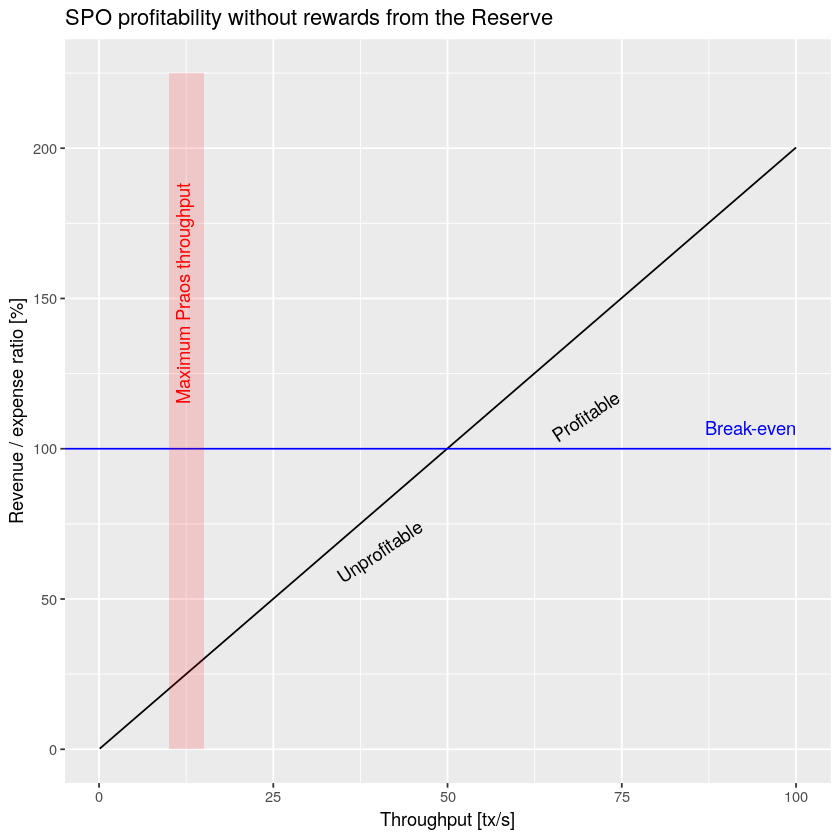

In [8]:
ggplot(
    data.table(
        `Throughput [tx/s]`=0.1*1:1000,
        `Revenue / expense ratio [%]`=100*mapply(revenueExpenseRatio, 0.1*1:1000)
    ),
    aes(x=`Throughput [tx/s]`, y=`Revenue / expense ratio [%]`)
) +
    geom_line() +
    annotate("text", label="Unprofitable                                Profitable", x=35, y=55, color="black", hjust=0, vjust=0, angle=33.3) +
    geom_hline(yintercept=100, color="blue") +
    annotate("text", label="Break-even", x=100, y=100, color="blue", hjust=1, vjust=-1) +
    annotate("rect", xmin = 10, xmax = 15, ymin = 0, ymax = 225, fill = "red", alpha = 0.15) +
    annotate("text", label="Maximum Praos throughput", x=13, y=115, color="red", hjust=0, vjust=0, angle=90) +
    ggtitle("SPO profitability without rewards from the Reserve")

In [9]:
ggsave("spo-profitability.png", units="in", dpi=150, width=8, height=6)

In [10]:
ggsave("spo-profitability.svg", units="in", dpi=150, width=8, height=6)

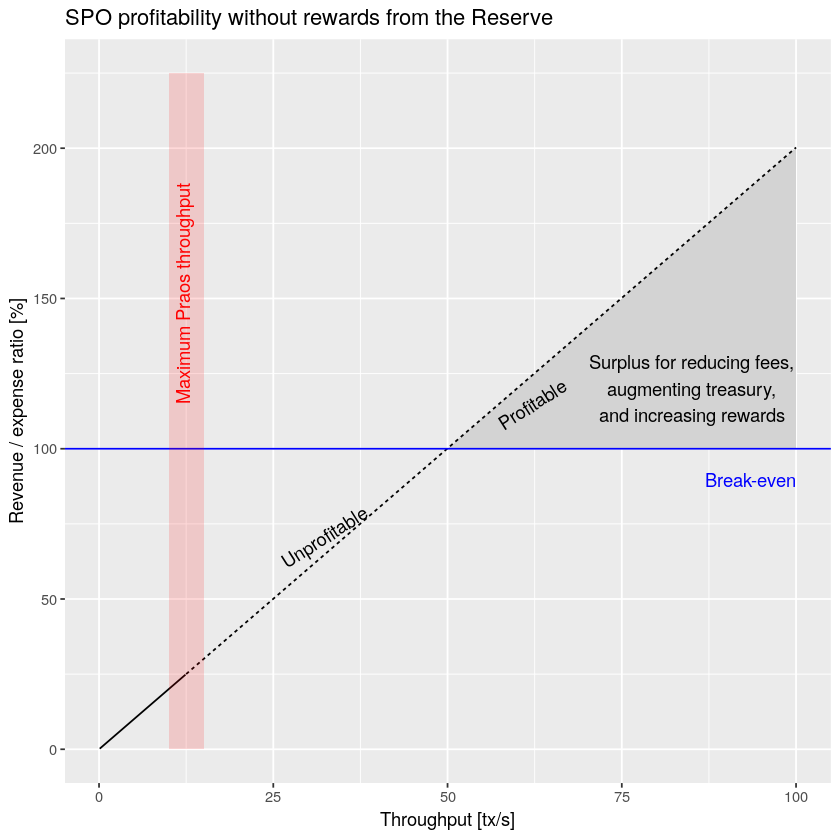

In [11]:
ggplot(
    data.table(
        `Throughput [tx/s]`=0.1*1:1000,
        `Revenue / expense ratio [%]`=100*mapply(revenueExpenseRatio, 0.1*1:1000),
        `Status`=(0.1*1:1000)>=12.5
    ),
    aes(x=`Throughput [tx/s]`, y=`Revenue / expense ratio [%]`, linetype=`Status`)
) +
    geom_polygon(data=data.table(x=c(50,100,100),y=c(100,100,200)), aes(x=x,y=y), fill="lightgray", linetype="solid") +
    geom_line() +
    annotate("text", label="Surplus for reducing fees,\naugmenting treasury,\nand increasing rewards", x=85, y=120) +
    annotate("text", label="Unprofitable                                Profitable", x=27, y=60, color="black", hjust=0, vjust=0, angle=32.5) +
    geom_hline(yintercept=100, color="blue") +
    annotate("text", label="Break-even", x=100, y=82.5, color="blue", hjust=1, vjust=-1) +
    annotate("rect", xmin = 10, xmax = 15, ymin = 0, ymax = 225, fill = "red", alpha = 0.15) +
    annotate("text", label="Maximum Praos throughput", x=13, y=115, color="red", hjust=0, vjust=0, angle=90) +
    ggtitle("SPO profitability without rewards from the Reserve") +
    theme(legend.position = "none")

In [12]:
ggsave("spo-profitability.png", units="in", dpi=150, width=8, height=6)

In [13]:
ggsave("spo-profitability.svg", units="in", dpi=150, width=8, height=6)